In [20]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [3]:
fig_dir = '/Users/lucyowen/repos/supereeg_paper/paper_figs/supplemental'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyfr_across = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_across.csv', index_col=0)
pyfr_within = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/pyfr/pyfr_within.csv', index_col=0)

## Merge dataframes

In [6]:
pyFR_df = pd.merge(pyfr_across, pyfr_within, on=['Subject', 'R'])
pyFR_df.dropna(inplace=True)
pyFR_df.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
e_corrs = pd.DataFrame()
e_corrs['across'] = plot.r2z(pyFR_df['Correlation_Across'])
e_corrs['within'] = plot.r2z(pyFR_df['Correlation_Within'])
e_corrs['Subject'] = pyFR_df['Subject']
e_corrs['R'] = pyFR_df['R']

## Across vs within subject analysis

In [7]:
pyfr_locs = plot.compile_df_locs(pyfr_across['R'])
corr_pyfr_locs = np.atleast_2d(pyfr_across['Correlation'])

In [8]:
long_form_across = pd.DataFrame()
long_form_across['Correlation'] = pyFR_df['Correlation_Across']
long_form_across['Subject'] = 'a'
long_form_across['Experiment'] = 'w'
long_form_within = pd.DataFrame()
long_form_within['Correlation'] = pyFR_df['Correlation_Within']
long_form_within['Subject'] = 'w'
long_form_within['Experiment'] = 'w'

In [9]:
long_form_pyfr = long_form_across.append(long_form_within)

6
7


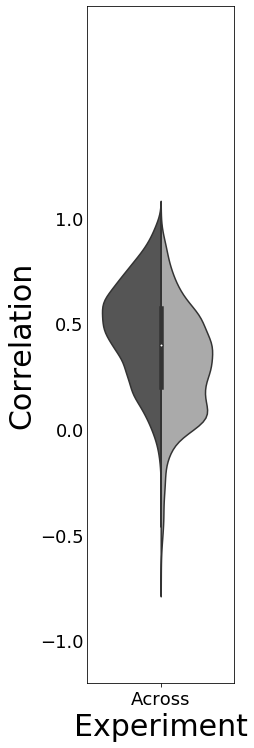

In [10]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
fig = plt.gcf()
fig.set_size_inches(3.5, 10.5)
plt.ylim(-1.2,2.0)
ax = sns.violinplot(x="Experiment", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_pyfr, palette="gray", split=True)
ax.legend().set_visible(False)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', which='both', length=0, labelsize=18)

ax.set_xticklabels(['Across', 'All', 'Within'])
ax.set_ylabel('Correlation', fontsize=30)
ax.set_xlabel('Experiment', fontsize=30)
for index, label in enumerate(ax.yaxis.get_ticklabels()):
    if index > 5:
        print(index)
        label.set_visible(False)

plt.tight_layout()
plt.savefig(outfile)

# RAM

In [11]:
W_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-a_exp.csv', index_col=0)
W_a_a.name = 'W_a_a'
W_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-all_exp.csv', index_col=0)
W_a_all.name = 'W_a_all'
W_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/a_sub-w_exp.csv', index_col=0)
W_a_w.name = 'W_a_w'
W_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-a_exp.csv', index_col=0)
W_w_a.name = 'W_w_a'
W_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-all_exp.csv', index_col=0)
W_w_all.name = 'W_w_all'
W_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/within/w_sub-w_exp.csv', index_col=0)
W_w_w.name = 'W_w_w'

In [12]:
dfs = [W_a_a, W_a_all, W_a_w, W_w_a, W_w_all, W_w_w]

In [13]:
RAM_df = dfs[0]
RAM_df = RAM_df.rename(columns={"Correlation":RAM_df.name})
for df_ in dfs[1:]:
    RAM_df = RAM_df.merge(df_, on=['Subject', 'R'])
    
    RAM_df = RAM_df.rename(columns={"Correlation":df_.name})

In [14]:
RAM_df.head()

,R,W_a_a,Subject,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w
0,[-50.39 18.22 -43.3 ],0.242494,R1083J_RAM_CatFR1_2,0.300987,0.447637,-0.162586,0.236228,0.061755
1,[-46.17 18.21 -42.23],0.177056,R1083J_RAM_CatFR1_1,0.046046,0.478972,0.165845,0.275166,0.292074
2,[-57.19 19.07 -44.75],0.234188,R1083J_RAM_CatFR1_4,0.788364,0.916196,0.542039,-0.021315,0.117429
3,[-43.21 18.21 -41.49],0.336156,R1083J_RAM_CatFR1_0,0.536711,0.796827,0.005241,-0.211179,0.046857
4,[-54.86 15.87 40.38],0.024989,R1032D_RAM_FR1_3,0.426785,0.232029,0.187670,0.312530,0.378536


In [15]:
RAM_df.dropna(inplace=True)

In [16]:
RAM_df.shape

(2975, 8)

In [17]:
column_corrs = []
for d in dfs:
    column_corrs.append(d.name)

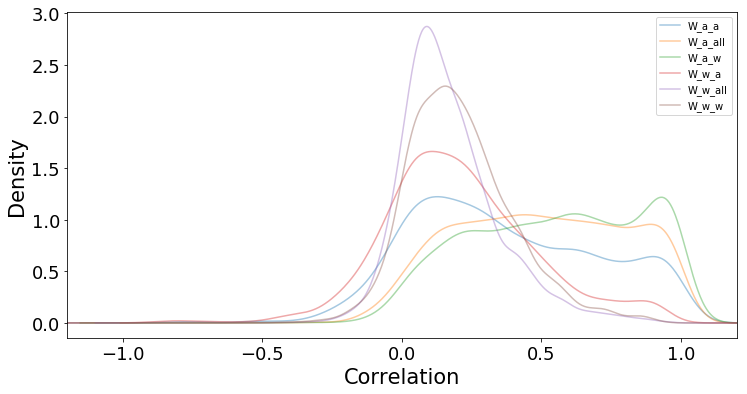

In [18]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

ax = RAM_df[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [21]:
all_subject_e = np.array([])
all_W_w_w = np.array([])
all_W_a_w = np.array([])
all_W_a_all= np.array([])
all_W_a_a = np.array([])
all_W_w_all = np.array([])
all_W_w_a = np.array([])


all_R_e = np.array([])
for i , item in enumerate(RAM_df['Subject'].values):
    #print(item.split('_')[0])
    all_subject_e = np.append(all_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    all_W_w_w = np.append(all_W_w_w, RAM_df['W_w_w'].iloc[i])
    all_W_a_w = np.append(all_W_a_w, RAM_df['W_a_w'].iloc[i])
    all_W_a_all= np.append(all_W_a_all, RAM_df['W_a_all'].iloc[i])
    all_W_a_a = np.append(all_W_a_a, RAM_df['W_a_a'].iloc[i])
    all_W_w_all = np.append(all_W_w_all, RAM_df['W_w_all'].iloc[i])
    all_W_w_a = np.append(all_W_w_a, RAM_df['W_w_a'].iloc[i])
    all_R_e = np.append(all_R_e, RAM_df['R'].iloc[i])

corr_all_e_df = pd.DataFrame()
corr_all_e_df['Subject'] = all_subject_e
corr_all_e_df['W_w_w'] = plot.r2z(all_W_w_w)
corr_all_e_df['W_a_w'] = plot.r2z(all_W_a_w )
corr_all_e_df['W_a_all'] = plot.r2z(all_W_a_all)
corr_all_e_df['W_a_a'] = plot.r2z(all_W_a_a)
corr_all_e_df['W_w_all'] = plot.r2z(all_W_w_all )
corr_all_e_df['W_w_a'] = plot.r2z(all_W_w_a )

corr_all_e_df['R'] = all_R_e

corr_all_e_df.dropna(inplace=True)

grouped_results_within = corr_all_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_within

## this didnt work... need to separate subject id from electrode number
grouped_within_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_within[df_.name].values
        f_corrs[f_.name] = grouped_results_within[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_within_t_test = grouped_within_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [22]:
grouped_within_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-4.482767,4.716975e-05
1,W_a_a,W_a_w,-5.590442,1.115420e-06
2,W_a_a,W_w_a,5.657080,8.858277e-07
3,W_a_a,W_w_all,5.585833,1.133326e-06
4,W_a_a,W_w_w,4.782324,1.749026e-05
5,W_a_all,W_a_w,-2.188762,3.361729e-02
6,W_a_all,W_w_a,12.120989,4.532250e-16
7,W_a_all,W_w_all,10.967025,1.497755e-14
8,W_a_all,W_w_w,10.007412,3.126948e-13
9,W_a_w,W_w_a,10.266812,1.359672e-13


In [23]:
def long_form_df(full_df, df_col):

    long_form = pd.DataFrame()
    long_form['Correlation'] = full_df[df_col.name]
    long_form['Subject'] = df_col.name.split('_')[1]
    long_form['Experiment'] = df_col.name.split('_')[2]
    
    return long_form

long_form = long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(long_form_df(RAM_df, df_))


In [24]:
long_form.head()

,Correlation,Subject,Experiment
0,0.242494,a,a
1,0.177056,a,a
2,0.234188,a,a
3,0.336156,a,a
4,0.024989,a,a


## plot all patients that participated in both experiments

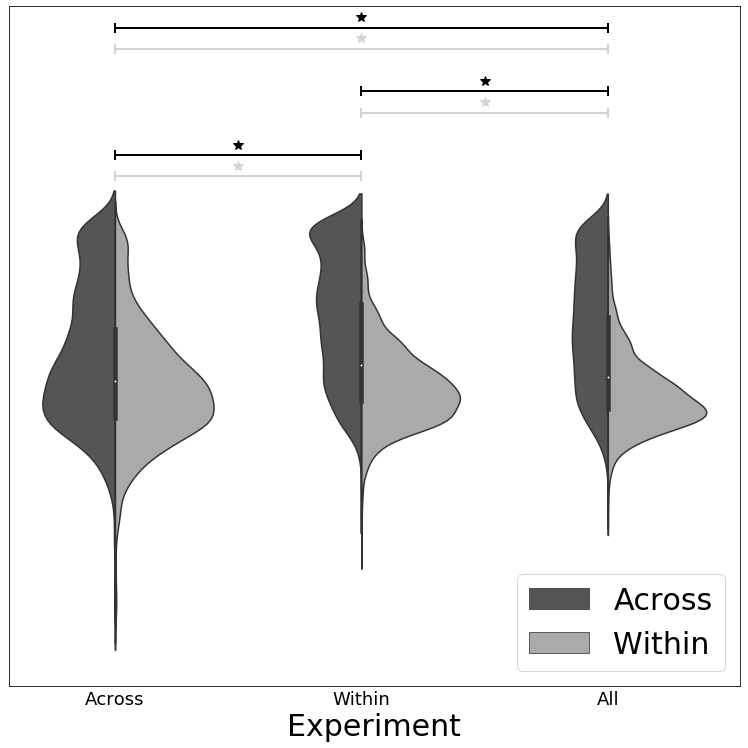

In [25]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_form, yticks=False, outfile=outfile)

In [26]:
for i in range(3):
    print( i)

0
1
2


## FR

In [27]:
str_find = '_FR1_'
str_find
FR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [28]:
fr_locs = plot.compile_df_locs(FR_df['R'])

In [29]:
fr_subject = np.array([])
fr_within = np.array([])
fr_across = np.array([])
fr_R = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject = np.append(fr_subject, item.split('_')[0])
    fr_within = np.append(fr_within, FR_df['W_w_w'].iloc[i])
    fr_across = np.append(fr_across, FR_df['W_a_w'].iloc[i])
    fr_R = np.append(fr_R, FR_df['R'].iloc[i])

In [30]:
corr_fr_df = pd.DataFrame()
corr_fr_df['Subject'] = fr_subject
corr_fr_df['W_w_w'] = plot.r2z(fr_within)
corr_fr_df['W_a_w'] = plot.r2z(fr_across)
corr_fr_df['R'] = fr_R

In [31]:
fr_locs = plot.compile_df_locs(corr_fr_df['R'])

In [32]:
long_formFR = long_form_df(FR_df, dfs[0])
for df_ in dfs[1:]:
    long_formFR = long_formFR.append(long_form_df(FR_df, df_))


6
7


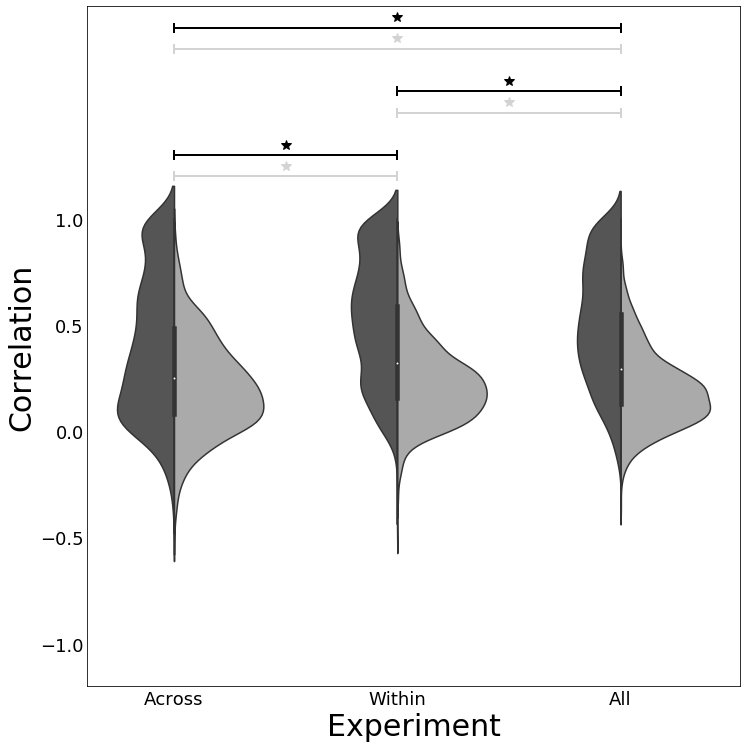

In [33]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formFR, legend=False, outfile=outfile)

In [40]:
FR_df

,R,W_a_a,Subject,W_a_all,W_a_w,W_w_a,W_w_all,W_w_w
4,[-54.86 15.87 40.38],0.024989,R1032D_RAM_FR1_3,0.426785,0.232029,0.187670,0.312530,0.378536
5,[-38.79 51.43 47.05],0.049455,R1032D_RAM_FR1_0,0.191558,0.514627,0.113440,0.072644,0.461210
6,[-52.44 24.4 43.61],0.104537,R1032D_RAM_FR1_2,0.294488,0.303376,0.284694,0.395410,0.345201
11,[-48.86 33.3 45.33],0.007091,R1032D_RAM_FR1_1,0.053449,0.135901,0.149836,0.200228,0.300453
12,[-57.67 6.22 38.01],0.384874,R1032D_RAM_FR1_4,0.506324,0.200728,0.049354,0.187545,0.354749
20,[-14.98 15.81 -33.96],0.504667,R1083J_RAM_FR1_4,0.710900,0.042206,0.056626,0.056565,0.023938
21,[-57.19 19.07 -44.75],0.781788,R1083J_RAM_FR1_3,0.192372,0.275576,0.229484,0.236306,0.127151
22,[-43.21 18.21 -41.49],0.629568,R1083J_RAM_FR1_0,0.738259,0.454748,0.335386,0.241443,0.071594
23,[-53.39 19.07 -43.78],0.923117,R1083J_RAM_FR1_2,0.430708,0.655567,0.173133,0.195836,0.079332
24,[-27.28 1.97 -20.61],0.255285,R1061T_RAM_FR1_2,0.230362,0.093762,-0.055535,-0.075859,-0.021173


In [44]:
fr_subject_e = np.array([])
fr_W_w_w = np.array([])
fr_W_a_w = np.array([])
fr_W_a_all= np.array([])
fr_W_a_a = np.array([])
fr_W_w_all = np.array([])
fr_W_w_a = np.array([])


fr_R_e = np.array([])
for i , item in enumerate(FR_df['Subject'].values):
    #print(item.split('_')[0])
    fr_subject_e = np.append(fr_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    fr_W_w_w = np.append(fr_W_w_w, FR_df['W_w_w'].iloc[i])
    fr_W_a_w = np.append(fr_W_a_w, FR_df['W_a_w'].iloc[i])
    fr_W_a_all= np.append(fr_W_a_all, FR_df['W_a_all'].iloc[i])
    fr_W_a_a = np.append(fr_W_a_a, FR_df['W_a_a'].iloc[i])
    fr_W_w_all = np.append(fr_W_w_all, FR_df['W_w_all'].iloc[i])
    fr_W_w_a = np.append(fr_W_w_a, FR_df['W_w_a'].iloc[i])
    fr_R_e = np.append(fr_R_e, FR_df['R'].iloc[i])

corr_fr_e_df = pd.DataFrame()
corr_fr_e_df['Subject'] = fr_subject_e
corr_fr_e_df['W_w_w'] = plot.r2z(fr_W_w_w)
corr_fr_e_df['W_a_w'] = plot.r2z(fr_W_a_w )
corr_fr_e_df['W_a_all'] = plot.r2z(fr_W_a_all)
corr_fr_e_df['W_a_a'] = plot.r2z(fr_W_a_a)
corr_fr_e_df['W_w_all'] = plot.r2z(fr_W_w_all)
corr_fr_e_df['W_w_a'] = plot.r2z(fr_W_w_a )

corr_fr_e_df['R'] = fr_R_e

corr_fr_e_df.dropna(inplace=True)

grouped_results_fr = corr_fr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_fr

## this didnt work... need to separate subject id from electrode number
grouped_fr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_fr[df_.name].values
        f_corrs[f_.name] = grouped_results_fr[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_fr_t_test = grouped_fr_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [45]:
grouped_fr_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-3.084914,5.231164e-03
1,W_a_a,W_a_w,-2.615785,1.545343e-02
2,W_a_a,W_w_a,3.751524,1.040511e-03
3,W_a_a,W_w_all,3.623562,1.425309e-03
4,W_a_a,W_w_w,3.078242,5.314378e-03
5,W_a_all,W_a_w,-0.386683,7.025452e-01
6,W_a_all,W_w_a,9.458012,2.164402e-09
7,W_a_all,W_w_all,8.870916,6.967892e-09
8,W_a_all,W_w_w,8.253180,2.502782e-08
9,W_a_w,W_w_a,6.223985,2.378353e-06


## CatFR

In [46]:
str_find = '_CatFR1_'
str_find
CatFR_df = RAM_df[RAM_df['Subject'].str.contains(str_find)]

In [47]:
catfr_subject = np.array([])
catfr_within = np.array([])
catfr_across = np.array([])
catfr_R = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject = np.append(catfr_subject, item.split('_')[0])
    catfr_within = np.append(catfr_within, CatFR_df['W_w_w'].iloc[i])
    catfr_across = np.append(catfr_across, CatFR_df['W_a_w'].iloc[i])
    catfr_R = np.append(catfr_R, CatFR_df['R'].iloc[i])

In [48]:
corr_catfr_df = pd.DataFrame()
corr_catfr_df['Subject'] = catfr_subject
corr_catfr_df['W_w_w'] = plot.r2z(catfr_within)
corr_catfr_df['W_a_w'] = plot.r2z(catfr_across)
corr_catfr_df['R'] = catfr_R

In [49]:
catfr_locs = plot.compile_df_locs(corr_catfr_df['R'])

In [50]:
long_formCatFR = long_form_df(CatFR_df, dfs[0])
for df_ in dfs[1:]:
    long_formCatFR = long_formCatFR.append(long_form_df(CatFR_df, df_))


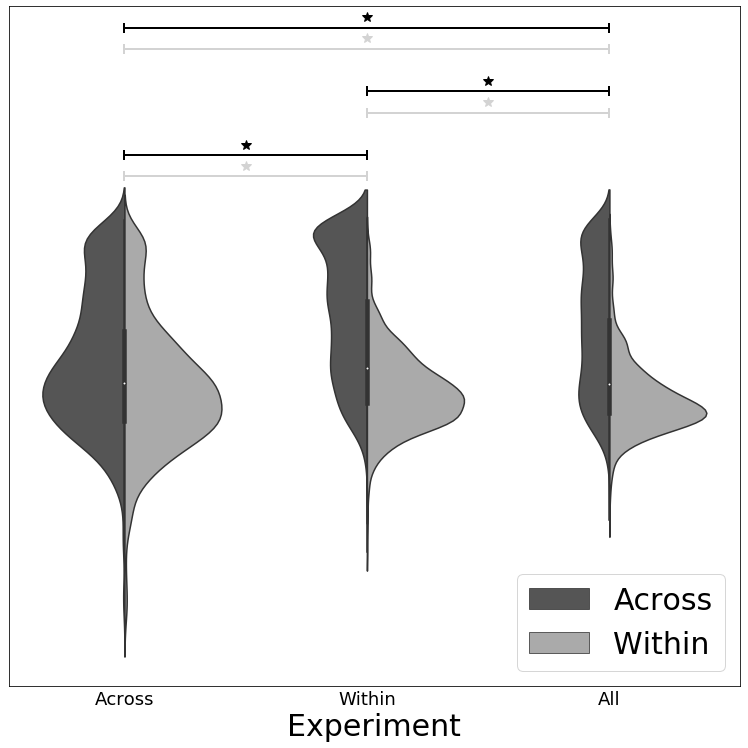

In [51]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formCatFR, yticks=False, outfile=outfile)

In [53]:
catfr_subject_e = np.array([])
catfr_W_w_w = np.array([])
catfr_W_a_w = np.array([])
catfr_W_a_all= np.array([])
catfr_W_a_a = np.array([])
catfr_W_w_all = np.array([])
catfr_W_w_a = np.array([])


catfr_R_e = np.array([])
for i , item in enumerate(CatFR_df['Subject'].values):
    #print(item.split('_')[0])
    catfr_subject_e = np.append(catfr_subject_e, item.split('_')[0] + '_' + item.split('_')[1]+ '_' + item.split('_')[2])
    catfr_W_w_w = np.append(catfr_W_w_w, CatFR_df['W_w_w'].iloc[i])
    catfr_W_a_w = np.append(catfr_W_a_w, CatFR_df['W_a_w'].iloc[i])
    catfr_W_a_all= np.append(catfr_W_a_all, CatFR_df['W_a_all'].iloc[i])
    catfr_W_a_a = np.append(catfr_W_a_a, CatFR_df['W_a_a'].iloc[i])
    catfr_W_w_all = np.append(catfr_W_w_all, CatFR_df['W_w_all'].iloc[i])
    catfr_W_w_a = np.append(catfr_W_w_a, CatFR_df['W_w_a'].iloc[i])
    catfr_R_e = np.append(catfr_R_e, CatFR_df['R'].iloc[i])

corr_catfr_e_df = pd.DataFrame()
corr_catfr_e_df['Subject'] = catfr_subject_e
corr_catfr_e_df['W_w_w'] = plot.r2z(catfr_W_w_w)
corr_catfr_e_df['W_a_w'] = plot.r2z(catfr_W_a_w )
corr_catfr_e_df['W_a_all'] = plot.r2z(catfr_W_a_all)
corr_catfr_e_df['W_a_a'] = plot.r2z(catfr_W_a_a)
corr_catfr_e_df['W_w_all'] = plot.r2z(catfr_W_w_all)
corr_catfr_e_df['W_w_a'] = plot.r2z(catfr_W_w_a )

corr_catfr_e_df['R'] = catfr_R_e

corr_catfr_e_df.dropna(inplace=True)

grouped_results_catfr = corr_catfr_e_df.groupby('Subject')['W_a_a','W_a_all', 'W_a_w', 'W_w_w', 'W_w_all', 'W_w_a'].mean()

grouped_results_catfr

## this didnt work... need to separate subject id catfrom electrode number
grouped_catfr_t_test = pd.DataFrame(columns=['Column_1', 'Column_2', 't' ,'p'])
i = 0
for df_ in dfs[0:]:
    i += 1
    for f_ in dfs[i:]:
        
        f_corrs = pd.DataFrame()
        f_corrs[df_.name] = grouped_results_catfr[df_.name].values
        f_corrs[f_.name] = grouped_results_catfr[f_.name].values
        tstat = stats.ttest_rel(f_corrs[df_.name], f_corrs[f_.name])
        grouped_catfr_t_test = grouped_catfr_t_test.append({
            'Column_1' : df_.name,
            'Column_2' : f_.name, 
            't' : tstat[0],
            'p' : tstat[1]
            }, ignore_index=True)

In [54]:
grouped_catfr_t_test

,Column_1,Column_2,t,p
0,W_a_a,W_a_all,-3.202755,3.952565e-03
1,W_a_a,W_a_w,-5.727642,7.821513e-06
2,W_a_a,W_w_a,5.006197,4.593227e-05
3,W_a_a,W_w_all,4.702895,9.761128e-05
4,W_a_a,W_w_w,4.042188,5.065657e-04
5,W_a_all,W_a_w,-2.654616,1.416079e-02
6,W_a_all,W_w_a,7.698524,8.237659e-08
7,W_a_all,W_w_all,6.775654,6.544420e-07
8,W_a_all,W_w_w,6.121297,3.035996e-06
9,W_a_w,W_w_a,8.469268,1.591029e-08


## Across

In [ ]:
A_a_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-a_exp.csv', index_col=0)
A_a_a.name = 'A_a_a'
A_a_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-all_exp.csv', index_col=0)
A_a_all.name = 'A_a_all'
A_a_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/a_sub-w_exp.csv', index_col=0)
A_a_w.name = 'A_a_w'
A_w_a = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-a_exp.csv', index_col=0)
A_w_a.name = 'A_w_a'
A_w_all = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-all_exp.csv', index_col=0)
A_w_all.name = 'A_w_all'
A_w_w = pd.read_csv('/Users/lucyowen/Desktop/paper_figures/ram/across/w_sub-w_exp.csv', index_col=0)
A_w_w.name = 'A_w_w'

In [ ]:
dfs_2 = [A_a_a, A_a_all, A_a_w, A_w_w]

In [ ]:
RAM_df_2 = dfs_2[0]
RAM_df_2 = RAM_df_2.rename(columns={"Correlation":RAM_df_2.name})
for df_ in dfs_2[1:]:
    RAM_df_2 = RAM_df_2.merge(df_, on=['Subject', 'R'])
    RAM_df_2 = RAM_df_2.rename(columns={"Correlation":df_.name})

In [ ]:
RAM_df_2.dropna(inplace=True)

In [ ]:
column_corrs = []
for d in dfs_2:
    column_corrs.append(d.name)

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')

RAM_df_2[column_corrs].plot(kind='kde', figsize=[12,6], alpha=.4, legend=True, xlim=(-1.2, 1.2))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_ylabel('Density', fontsize=21)
ax.set_xlabel('Correlation', fontsize=21)
plt.savefig(outfile)

In [ ]:
long_formRAM = long_form_df(RAM_df_2, dfs_2[0])
for df_ in dfs_2[1:]:
    long_formRAM = long_formRAM.append(long_form_df(RAM_df_2, df_))


In [ ]:
long_form_within = pd.DataFrame()
long_form_within = long_form_df(RAM_df, dfs[3])
for df_ in dfs[4:5]:
    long_form_within  = long_form_within.append(long_form_df(RAM_df, df_))

In [ ]:
long_formRAM = long_formRAM.append(long_form_within)

In [ ]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_split_violin(long_formRAM, yticks=False, outfile=outfile)

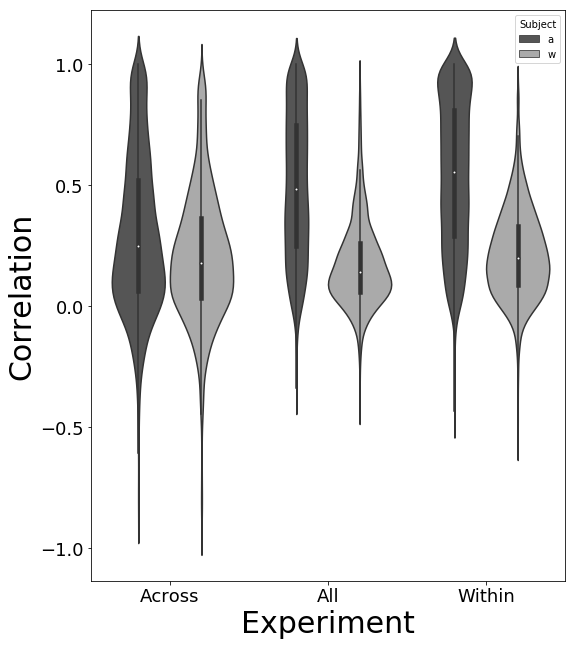

In [40]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
fig = plt.gcf()
fig.set_size_inches(8.5, 10.5)
ax = sns.violinplot(x="Experiment", y="Correlation",hue="Subject", data=long_formRAM, palette="gray", split=False)
# leg = ax.legend(['Within', 'Across'], fontsize=18, loc='lower right')
# LH = leg.legendHandles
# LH[1].set_color('k')
# LH[1].set_alpha(1)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xticklabels(['Across', 'All', 'Within'])
ax.set_ylabel('Correlation', fontsize=30)
ax.set_xlabel('Experiment', fontsize=30)
plt.savefig(outfile)